In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1) Import dataset
# This dataset is small and clean
# so we can show and do some plots immediately

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


# filter out order with # of items = 0 (if there is any)to clean the data,
# since it contributes nothing to the AOV

In [4]:
df= df[df['total_items']>0]

In [5]:
df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [6]:
df['created_at'] = pd.to_datetime(df['created_at'])

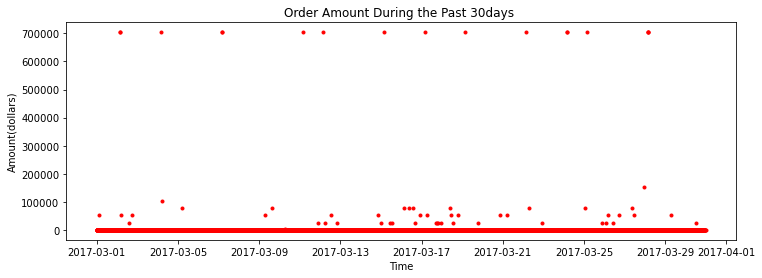

In [7]:
plt.figure(figsize=(12, 4))
plt.title('Order Amount During the Past 30days ')
plt.xlabel('Time')
plt.ylabel('Amount(dollars)')
plt.plot(df['created_at'],df['order_amount'],'r.')
plt.show()

# 2) Analysis the dataset
# Several noise points found around 700,000, which makes nonses
# Plot out the # of items to see if it consistent

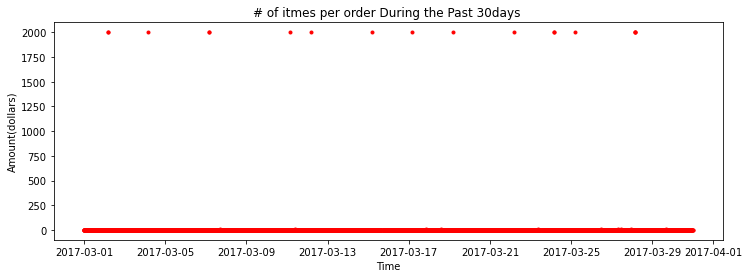

In [8]:
plt.figure(figsize=(12, 4))
plt.title('# of itmes per order During the Past 30days ')
plt.xlabel('Time')
plt.ylabel('Amount(dollars)')
plt.plot(df['created_at'],df['total_items'],'r.')
plt.show()

# Conclusion: we have 12 cases of extreme value mighe be noise,
# PS: Although we can see a line around y = 0 , it was casued by comprasion to 2000 in the same graph, those values should all be small values <10

# 2.1) Nosie around total_items = 2000

In [9]:
Noise_extreme_large_df= df[df['total_items'] == 2000]

In [10]:
Noise_extreme_large_df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 04:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 04:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 04:00:00


# Conclusion: we got the insight that those abnormal orders were all placed by the same user with id 607

# 3) Re-process Dataset

# 3.1 Filter out those noise data around total_items = 2000 and continue 

In [11]:
# As we can see from previous table, all other # of items in each order is way less than 2000
df= df[df['total_items'] < 2000]

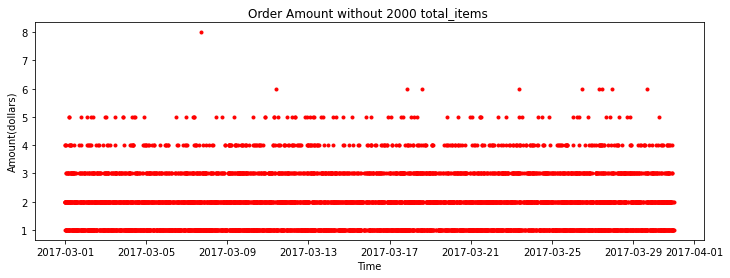

In [12]:
plt.figure(figsize=(12, 4))
plt.title('Order Amount without 2000 total_items ')
plt.xlabel('Time')
plt.ylabel('Amount(dollars)')
plt.plot(df['created_at'],df['total_items'],'r.')
plt.show()

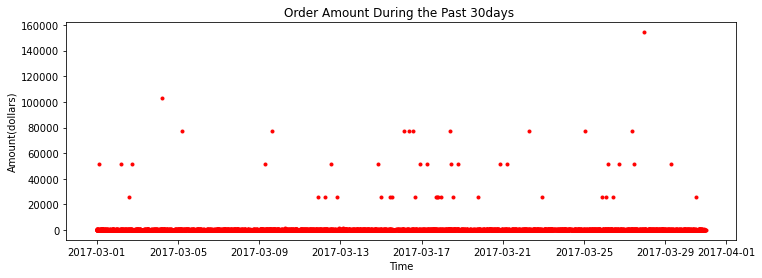

In [13]:
plt.figure(figsize=(12, 4))
plt.title('Order Amount During the Past 30days ')
plt.xlabel('Time')
plt.ylabel('Amount(dollars)')
plt.plot(df['created_at'],df['order_amount'],'r.')
plt.show()

# Another issue pops out, we found that some orders have extremly large amount while the maximun number of items in all orders is 8

# 3.2 Generate a column of the Average Amount of itmes in a single order

In [14]:
pd.set_option('mode.chained_assignment', None)
df['ave_amount_of_item'] = df['order_amount'] / df['total_items']

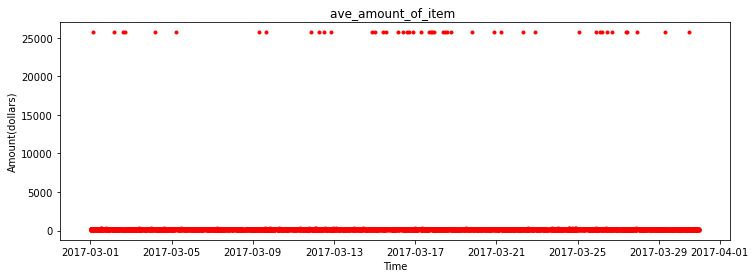

In [15]:
plt.figure(figsize=(12, 4))
plt.title('ave_amount_of_item ')
plt.xlabel('Time')
plt.ylabel('Amount(dollars)')
plt.plot(df['created_at'],df['ave_amount_of_item'],'r.')
plt.show()

# Now we see that some shoes have price around 25,000 while we are given that these shops only sell relatively affordable items. So we can discard them.

In [16]:
df= df[df['ave_amount_of_item'] < 5000]
df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,ave_amount_of_item
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 04:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 04:35:11,156.0
...,...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17,165.0
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16,117.0
4997,4998,56,867,351,3,cash,2017-03-19 05:42:42,117.0
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18,177.0


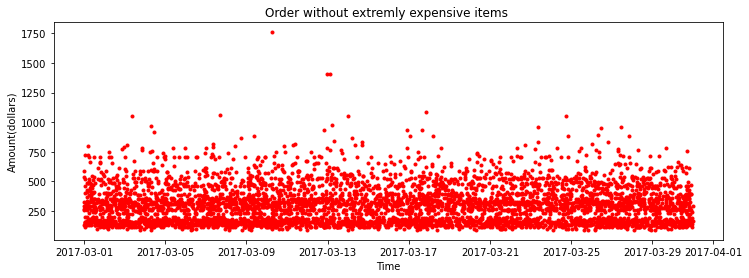

In [17]:
plt.figure(figsize=(12, 4))
plt.title('Order without extremly expensive items ')
plt.xlabel('Time')
plt.ylabel('Amount(dollars)')
plt.plot(df['created_at'],df['order_amount'],'r.')
plt.show()

# Now we have what we are looking for and ready to do the calculation

# 4) Calculate the AOV

In [18]:
total_amount = df['order_amount'].sum()
total_amount

1493840

In [19]:
total_items = df['total_items'].sum()
total_items

9848

In [20]:
AOV = total_amount/ total_items

In [21]:
AOV

151.68968318440292